 **Задание 1**

Ссылка на выбранный датасет:
https://www.kaggle.com/datasets/milanvaddoriya/data-science-job-salary/versions/1?resource=download


**Задание 2**

Создан .md файл с описанием датасета

**Задание 3**

In [168]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv('datascience_salaries.csv')
df.drop_duplicates()
display(df.head())
display(df.tail())
df.info()
df.describe()

,Unnamed: 0,job_title,job_type,experience_level,location,salary_currency,salary
0,0,Data scientist,Full Time,Senior,New York City,USD,149000
1,2,Data scientist,Full Time,Senior,Boston,USD,120000
2,3,Data scientist,Full Time,Senior,London,USD,68000
3,4,Data scientist,Full Time,Senior,Boston,USD,120000
4,5,Data scientist,Full Time,Senior,New York City,USD,149000


,Unnamed: 0,job_title,job_type,experience_level,location,salary_currency,salary
1166,2243,ML Ops,Full Time,Senior,Toronto,USD,228000
1167,2249,ML Ops,Full Time,Senior,Boston,USD,115000
1168,2250,ML Ops,Full Time,Senior,Delhi,USD,76000
1169,2255,ML Ops,Full Time,Senior,San Francisco,USD,68000
1170,2259,ML Ops,Internship,Senior,New York City,USD,135000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1171 entries, 0 to 1170
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1171 non-null   int64 
 1   job_title         1171 non-null   object
 2   job_type          1171 non-null   object
 3   experience_level  1171 non-null   object
 4   location          1171 non-null   object
 5   salary_currency   1171 non-null   object
 6   salary            1171 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 64.2+ KB


,Unnamed: 0,salary
count,1171.000000,1171.000000
mean,931.620837,64836.037575
std,647.445266,32551.767046
min,0.000000,30000.000000
25%,364.500000,45000.000000
50%,815.000000,63000.000000
75%,1504.500000,68000.000000
max,2259.000000,228000.000000


**Задание 4**

In [169]:
del df[df.columns[0]]
df = df.rename(columns = {'salary_currency': 'currency'})
df

,job_title,job_type,experience_level,location,currency,salary
0,Data scientist,Full Time,Senior,New York City,USD,149000
1,Data scientist,Full Time,Senior,Boston,USD,120000
2,Data scientist,Full Time,Senior,London,USD,68000
3,Data scientist,Full Time,Senior,Boston,USD,120000
4,Data scientist,Full Time,Senior,New York City,USD,149000
...,...,...,...,...,...,...
1166,ML Ops,Full Time,Senior,Toronto,USD,228000
1167,ML Ops,Full Time,Senior,Boston,USD,115000
1168,ML Ops,Full Time,Senior,Delhi,USD,76000
1169,ML Ops,Full Time,Senior,San Francisco,USD,68000


**Задание 5**

a) гистограмма распределения любого числового признака

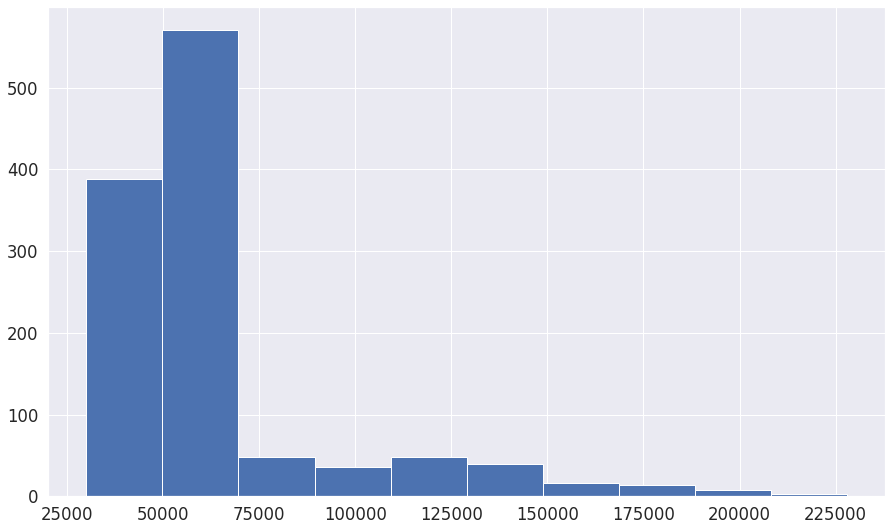

In [170]:
hist = df["salary"].hist()
plt.savefig("/content/hist.png")
plt.show(hist)

b) диаграмма «ящик с усами» для любого числового признака

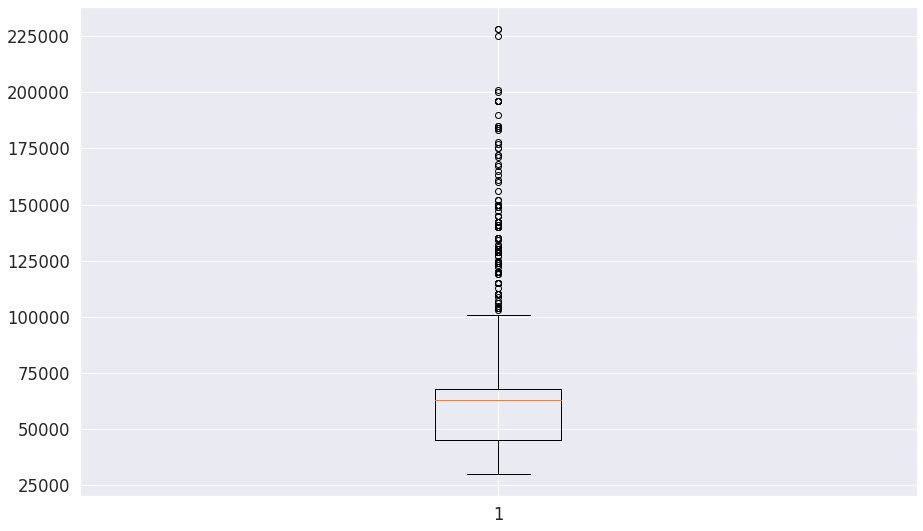

In [171]:
boxplot=plt.boxplot(df['salary'])
plt.savefig("/content/boxplot.png")
plt.show(boxplot)

c) круговая диаграмма

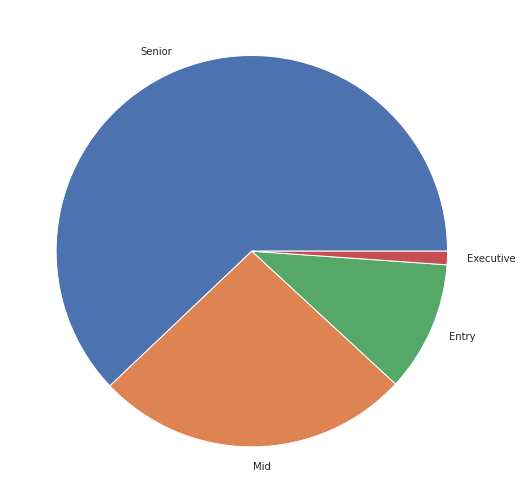

In [172]:
col = df['experience_level'].value_counts()
pie=plt.pie(col.values, labels = col.keys(),textprops={'fontsize': 10})
plt.rcParams["figure.figsize"] = (10,8)
plt.savefig("/content/pie.png")
plt.show(pie)

d) тепловая карта со значениями взаимной корреляции между всеми парами признаков набора данных

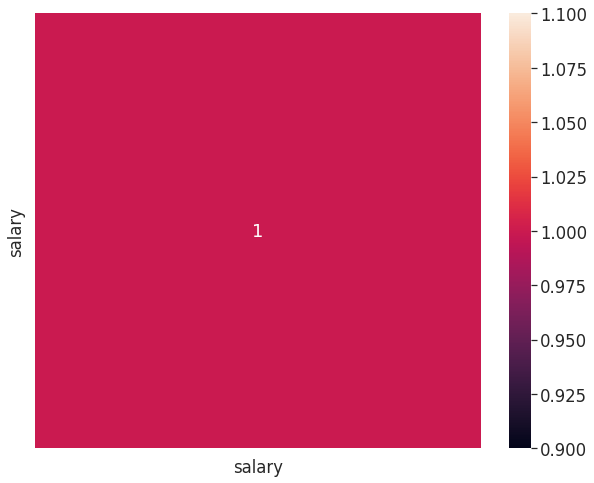

In [173]:
sns.set (font_scale= 1.5)
sns.heatmap(df.corr(), annot = True)
plt.savefig("/content/heatmap.png")
plt.show()

e) диаграмма countplot с группировкой по двум номинативным признакам

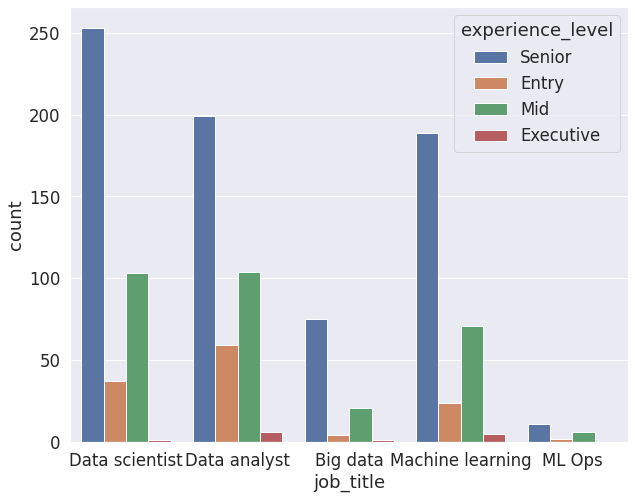

In [174]:
countplot = sns.countplot(x = "job_title", hue = "experience_level", data = df)
plt.rcParams["figure.figsize"] = (15,9)
plt.savefig("/content/countplot.png")
plt.show(countplot)

**Задание 6**

In [175]:
print(pd.isnull(df).sum())

job_title           0
job_type            0
experience_level    0
location            0
currency            0
salary              0
dtype: int64


**Задание 7**

In [176]:
print(stats.normaltest(df.iloc[0:200]["salary"]))

NormaltestResult(statistic=73.64346188542999, pvalue=1.0198244913528082e-16)


**Задание 8**

In [177]:
one_hot_encoded = pd.get_dummies(df, columns =df.columns)
display(one_hot_encoded)

,job_title_Big data,job_title_Data analyst,job_title_Data scientist,job_title_ML Ops,job_title_Machine learning,job_type_Full Time,job_type_Internship,experience_level_Entry,experience_level_Executive,experience_level_Mid,...,salary_178000,salary_183000,salary_184000,salary_185000,salary_190000,salary_196000,salary_200000,salary_201000,salary_225000,salary_228000
0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1166,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1167,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1168,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1169,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Задание 9**

In [178]:
df.to_csv('output.csv')